In [ ]:
import dask
from dask.distributed import Client, performance_report
from distributed.diagnostics import MemorySampler
client = Client()
client

In [ ]:
import dask.array as da
size = 50000
n_svdvtriplets = 9

In [ ]:
x = da.random.random(size=(size, size))

In [ ]:
svdvec_left, svdvals, svdvec_right = da.linalg.svd_compressed(x, k=n_svdvtriplets)
svdvec_left1, svdvals1, svdvec_right1 = da.linalg.svd_compressed(x, k=n_svdvtriplets, compute=True)
# with performance_report("report-nocompute.html"):
ms = MemorySampler()
memoryState = 'managed_spilled'
interval = 0.01
with ms.sample("compute=False", measure=memoryState, interval=interval):
    svdvec_left, svdvals, svdvec_right = dask.compute(svdvec_left, svdvals, svdvec_right)

with ms.sample("compute=True", measure=memoryState, interval=interval):
    svdvec_left1, svdvals1, svdvec_right1 = dask.compute(svdvec_left1, svdvals1, svdvec_right1)

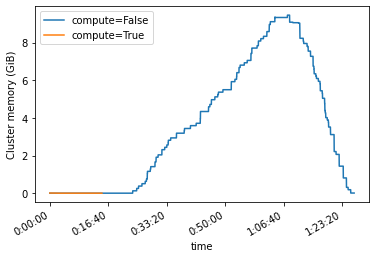

In [104]:

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime

fig, ax = plt.subplots()

ms.plot(align=True, ax=ax)

def timeTicks(x, pos):                                                                                                                                                                                                                                                         
    d = datetime.timedelta(seconds=x)                                                                                                                                                                                                                                          
    return str(d)                                                                                                                                                                                                                                                              
formatter = matplotlib.ticker.FuncFormatter(timeTicks)                                                                                                                                                                                                                         
ax.xaxis.set_major_formatter(formatter)             

plt.show()
